In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import random
import re
import json

In [2]:
df = pd.read_csv("Job_Data.csv")
df.head()

,COMPANY,EXPERIENCE,LOCATION,TITLE,SALARY,SKILLS
0,KPMG,15+ yrs,Hyderabad,Software Engineer,"50,00,000",C
1,Premium-Jobs hiring for Internet,15+ yrs,Bengaluru,Software Engineer,"50,00,000",JavaScript
2,Vanguard Human Resource Consultant,15+ yrs,Bengaluru,Software Engineer,"50,00,000",JavaScript
3,V- Konnect Associates,15+ yrs,Bengaluru,Data Analyst,"50,00,000",Python
4,Spruce Software Tech,15+ yrs,Bengaluru,Data Analyst,"50,00,000",Python


To ensure data integrity and facilitate error-free operations, it is advisable to eliminate any leading or trailing spaces, as well as superfluous characters, from column names within a dataset. This can be accomplished by utilizing the str.strip() method, which effectively removes any whitespace. By proactively implementing this practice, the likelihood of encountering issues or difficulties stemming from overlooked spaces is greatly diminished, sparing users from potential frustrations and complications.

In [3]:
df.columns = df.columns.str.strip()

In [4]:
df.shape

(14581, 6)

In [5]:
df.isnull().sum()

COMPANY       0
EXPERIENCE    0
LOCATION      0
TITLE         0
SALARY        0
SKILLS        0
dtype: int64

Since i did most of my cleaning in excel there are no null values in my dataframe.

In [6]:
df.describe()

,COMPANY,EXPERIENCE,LOCATION,TITLE,SALARY,SKILLS
count,14581,14581,14581,14581,14581,14581
unique,7733,8,84,4,55,21
top,Confidential,7 - 10 yrs,Bengaluru,Data Scientist,"10,00,000",SQL
freq,105,11272,5288,6611,10393,3278


## NOW WE WILL SEE OUR SKILLS COLUMNS



### <span style="color:blue; font-size: 16px;">PLOTTING A WORLD CLOUD TO SEE WHAT ARE THE MOST POPULAR SKILLS .</span>


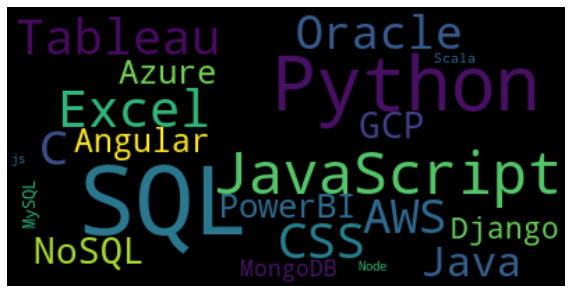

In [7]:
# Concatenate all the skills into a single string
skills_text = ' '.join(df['SKILLS'].astype(str))

# Create a word cloud with collocations disabled
wordcloud = WordCloud(collocations=False).generate(skills_text)

# Set the figure size
plt.figure(figsize=(10, 6))

# Display the word cloud with increased size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
skills_counts = df['SKILLS'].value_counts()

skills_counts

SQL           3278
Python        1880
JavaScript    1161
Excel          907
Tableau        792
CSS            781
C              758
AWS            745
R              720
Oracle         690
Java           566
GCP            401
NoSQL          399
Azure          346
PowerBI        342
Angular        303
Django         244
MongoDB        128
MySQL           65
Scala           40
Node.js         35
Name: SKILLS, dtype: int64

In [9]:
unique_skills = df['SKILLS'].unique()

# Print the unique skills
for skills in unique_skills:
    print(skills)

C
JavaScript
Python
SQL
Java
R
Excel
Oracle
NoSQL
CSS
Tableau
AWS
PowerBI
Angular
Azure
MySQL
Scala
MongoDB
Node.js
Django
GCP


### <span style="color:blue; font-size: 16px;">PLOTTING A BAR GRAPH TO SEE WHAT ARE THE TOP 10 MOST POPULAR SKILLS .</span>


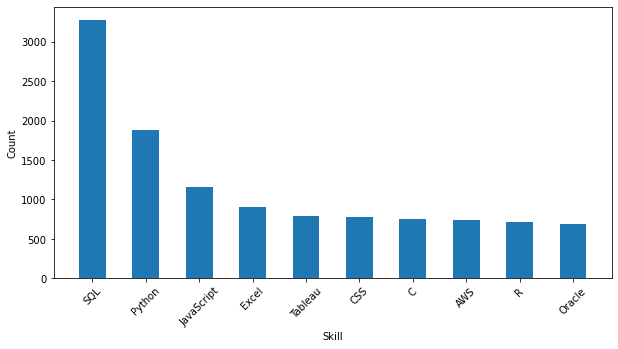

In [10]:
plt.figure(figsize=(10, 5))

# Count the frequency of each skill
skill_counts = df["SKILLS"].value_counts()

# Select the top 10 skills
top_skills = skill_counts.head(10) #just remove head to see all the skills

# Plot the top 10 skills
plt.bar(top_skills.index, top_skills.values, width=0.5)
plt.xlabel("Skill")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.show()

## NOW LET'S SEE OUR LOCATION COLUMN

In [11]:
location_counts = df['LOCATION'].value_counts()

location_counts

Bengaluru    5288
Mumbai       2257
Delhi        1814
Hyderabad    1693
Chennai      1322
             ... 
Mangalore       1
Hosur           1
#NAME?          1
Haridwar        1
Itanagar        1
Name: LOCATION, Length: 84, dtype: int64

In [12]:
unique_locations = df['LOCATION'].unique()

# Print the unique locations
for location in unique_locations:
    print(location)

Hyderabad
Bengaluru
Delhi
Mumbai
Pune
Chennai
Gurgaon
Noida
Faridabad
Kolkata
Thane
Aurangabad
Vadodara
Mysore
Greater
Nagpur
Ahemdabad
Kochi
Varanasi
Vijayawada
Ludhiana
Chandigarh
Ambala
Mathura
Ernakulam
Coimbatore
Panjim
Mangalore
Jodhpur
Hubli
Ghaziabad
Jaipur
Visakhapatnam
Vellore
Guntur
Patna
Nellore
Agartala
Guwahati
Bhubaneshwar
Bangalore
Kolar
Amritsar
Manesar
Bhiwadi
Lucknow
Dehradun
Jamshedpur
Agra
Cuddalore
Indore
Vasai
THANE
PANVEL
Kolhapur
Dimapur
Vikhroli
thane
Kanpur
Hosur
Belgaum
#NAME?
Haridwar
Sambalpur
Tirupati
Bawal
Ahmednagar
Karur
Tuticorin
Jalandhar
Trichy
Cuttack
Chandrapur
Anantapur
PUNE
Rajahmundry
Faizabad
Dahej
Dadra
Moradabad
Mehsana
Silchar
Surat
Itanagar


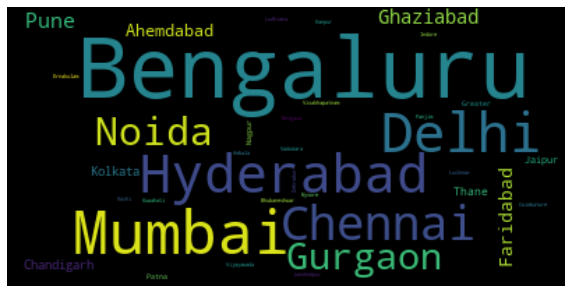

In [13]:
Location_text = ' '.join(df['LOCATION'].astype(str))

# Create a word cloud with collocations disabled
wordcloud = WordCloud(collocations=False).generate(Location_text)

# Set the figure size
plt.figure(figsize=(10, 6))

# Display the word cloud with increased size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### From the 3 outputs displayed above, it is evident that the "Location" column contains numerous unique values, with each location having only 1 job associated with it, which is not accurate neither does it help us with our project.

<br>Therefore, I have decided to remove all the existing data from the "Location" column and manually assign new location values.
<br>Rest assured, the new location I am assigning are not random but have been sourced from the website "https://www.dqindia.com/india-s-top-tech-cities/".

In [15]:
df1 = df.copy()  # Create a copy of the original dataframe

# Define the desired values for the LOCATION column
locations = ['Bangalore', 'Hyderabad', 'Mumbai', 'Chennai', 'Delhi', 'Pune', 'Gurugram', 'Kolkata', 'Lucknow', 'Coimbatore']

# Define the percentage distribution for each location
percentage_distribution = [22, 18, 15, 13, 12, 8, 6, 3, 2, 1]

# Calculate the number of rows for each location based on the percentage distribution
num_rows = [int(len(df1) * (percentage / 100)) for percentage in percentage_distribution]

# Calculate the remaining rows for distribution
remaining_rows = len(df1) - sum(num_rows)

# Adjust the number of rows for each location to account for remaining rows
num_rows[0] += remaining_rows

# Create a list to store the updated locations
updated_locations = []

# Distribute the locations based on the adjusted number of rows
for index, location in enumerate(locations):
    updated_locations.extend([location] * num_rows[index])
    
# Shuffle the list of locations randomly
np.random.shuffle(updated_locations)

# Update the LOCATION column in the dataframe
df1['LOCATION'] = updated_locations

#### NOTE: From now we will use df1

### <span style="color:blue; font-size: 16px;">PLOTTING A WORLD CLOUD TO SEE WHAT ARE THE MOST POPULAR LOCATIONS TO WORK IN .</span>

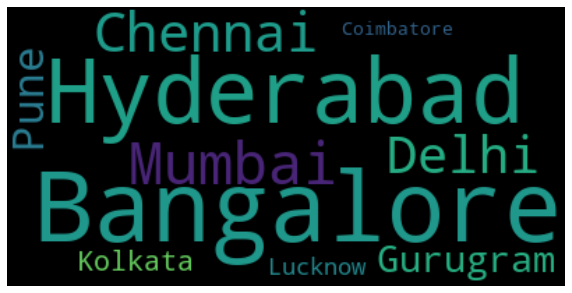

In [19]:
# Concatenate all the skills into a single string
Location_text = ' '.join(df1['LOCATION'].astype(str))

# Create a word cloud with collocations disabled
wordcloud = WordCloud(collocations=False).generate(Location_text)

# Set the figure size
plt.figure(figsize=(10, 6))

# Display the word cloud with increased size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
location_counts = df1['LOCATION'].value_counts()

location_counts

Bangalore     3213
Hyderabad     2624
Mumbai        2187
Chennai       1895
Delhi         1749
Pune          1166
Gurugram       874
Kolkata        437
Lucknow        291
Coimbatore     145
Name: LOCATION, dtype: int64

In [20]:
unique_locations = df1['LOCATION'].unique()

# Print the unique locations
for location in unique_locations:
    print(location)

Chennai
Delhi
Bangalore
Kolkata
Hyderabad
Pune
Mumbai
Gurugram
Coimbatore
Lucknow


### <span style="color:blue; font-size: 16px;">PLOTTING A BAR GRAPH TO SEE WHAT ARE THE MOST POPULAR LOCATIONS TO WORK IN .</span>

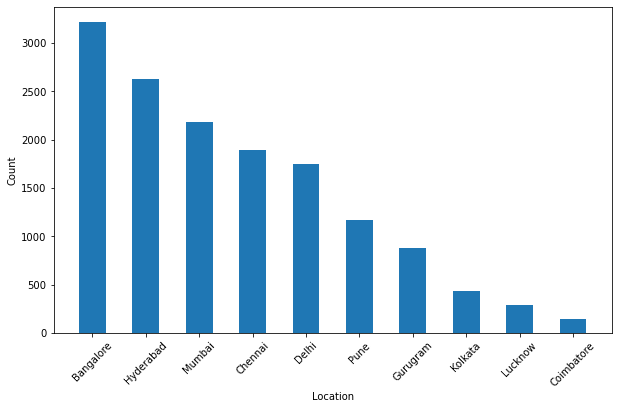

In [18]:
plt.figure(figsize=(10, 6))

# Count the frequency of each location
location_counts = df1["LOCATION"].value_counts()

# Select the top 5 locations
top_locations = location_counts

# Plot the top 5 locations
plt.bar(top_locations.index, top_locations.values, width=0.5)
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)


plt.show()

#### NOTE: Feel free to check from any other website or anywhere else that these are the top locations for IT jobs in india.

## NOW LET'S CHECK OUR SALARY COLUMN

In [21]:
column_type = type(df1['SALARY'].dtype)
print(column_type)

<class 'numpy.dtype[object_]'>


The salary column currently has an object data type, which prevents us from performing arithmetic operations on the values. To address this issue, we need to convert the data type to integer. However, before the conversion, it's necessary to remove any commas present in the column. By completing these steps, we can ensure that the salary values are in a suitable format for mathematical calculations and analysis.

In [22]:
df1['SALARY'] = df1['SALARY'].str.replace(',', '').astype('Int64')

# In this code first we removed the , and than change the type to integer.

In [23]:
df1.head()

,COMPANY,EXPERIENCE,LOCATION,TITLE,SALARY,SKILLS
0,KPMG,15+ yrs,Chennai,Software Engineer,5000000,C
1,Premium-Jobs hiring for Internet,15+ yrs,Delhi,Software Engineer,5000000,JavaScript
2,Vanguard Human Resource Consultant,15+ yrs,Delhi,Software Engineer,5000000,JavaScript
3,V- Konnect Associates,15+ yrs,Delhi,Data Analyst,5000000,Python
4,Spruce Software Tech,15+ yrs,Bangalore,Data Analyst,5000000,Python


In [24]:
column_type = type(df1['SALARY'].dtype)
print(column_type)

<class 'pandas.core.arrays.integer.Int64Dtype'>


#### Now we can easily perform arithmetic operations on Salary.

In [26]:
df1[df1.SALARY<300000].head()

,COMPANY,EXPERIENCE,LOCATION,TITLE,SALARY,SKILLS
13940,Saitech hiring for,Freshers,Bangalore,Consultant,275000,SQL
13941,Axis HR Consultancy Private Limited hiring for...,Freshers,Mumbai,Consultant,275000,SQL
13942,Inspiration Manpower Consultancy hiring for In...,Freshers,Bangalore,Consultant,275000,SQL
13943,Intelenet Global Services Private Limited,Freshers,Bangalore,Consultant,275000,SQL
13944,Apollo Health and Lifestyle,Freshers,Mumbai,Consultant,275000,SQL


In [27]:
df1["SALARY"].max()

5000000

In [28]:
df1["SALARY"].min()

200000

In [29]:
df1[df1.SALARY==df1.SALARY.max()].head()

,COMPANY,EXPERIENCE,LOCATION,TITLE,SALARY,SKILLS
0,KPMG,15+ yrs,Chennai,Software Engineer,5000000,C
1,Premium-Jobs hiring for Internet,15+ yrs,Delhi,Software Engineer,5000000,JavaScript
2,Vanguard Human Resource Consultant,15+ yrs,Delhi,Software Engineer,5000000,JavaScript
3,V- Konnect Associates,15+ yrs,Delhi,Data Analyst,5000000,Python
4,Spruce Software Tech,15+ yrs,Bangalore,Data Analyst,5000000,Python


In [30]:
df1[df1.SALARY==df1.SALARY.min()].head()

,COMPANY,EXPERIENCE,LOCATION,TITLE,SALARY,SKILLS
14247,Golar Networks,Freshers,Bangalore,Software Engineer,200000,CSS
14248,Sruthi Total Hr Solutions hiring for Leading MNC,Freshers,Delhi,Software Engineer,200000,CSS
14249,Danfoss Industries,Freshers,Chennai,Software Engineer,200000,CSS
14250,HCL Technologies Limited,Freshers,Mumbai,Software Engineer,200000,SQL
14251,Happy Placements,Freshers,Bangalore,Software Engineer,200000,SQL


In [31]:
df1[["COMPANY","SALARY"]][df1.SALARY==df1['SALARY'].max()].head()

,COMPANY,SALARY
0,KPMG,5000000
1,Premium-Jobs hiring for Internet,5000000
2,Vanguard Human Resource Consultant,5000000
3,V- Konnect Associates,5000000
4,Spruce Software Tech,5000000


In [32]:
df1[["TITLE","SALARY"]][df1.SALARY==df1['SALARY'].max()].head()

,TITLE,SALARY
0,Software Engineer,5000000
1,Software Engineer,5000000
2,Software Engineer,5000000
3,Data Analyst,5000000
4,Data Analyst,5000000


In [33]:
df1[["TITLE","SALARY"]][df1.SALARY==df1['SALARY'].min()].head()

,TITLE,SALARY
14247,Software Engineer,200000
14248,Software Engineer,200000
14249,Software Engineer,200000
14250,Software Engineer,200000
14251,Software Engineer,200000


In [34]:
df1[["COMPANY","SALARY"]][df1.SALARY==df1['SALARY'].max()].head()

,COMPANY,SALARY
0,KPMG,5000000
1,Premium-Jobs hiring for Internet,5000000
2,Vanguard Human Resource Consultant,5000000
3,V- Konnect Associates,5000000
4,Spruce Software Tech,5000000


## NOW LET'S SEE OUR TITLE COLUMN

Since we have spaces in between the name of the job title word cloud will not be able to effectively show the result. So we will plot a bar graph for easier undertsanding of the most popular job role.

### <span style="color:blue; font-size: 16px;">PLOTTING A BAR GRAPH TO SEE WHICH IS THE MOST POPULAR JOB ROLE.</span>

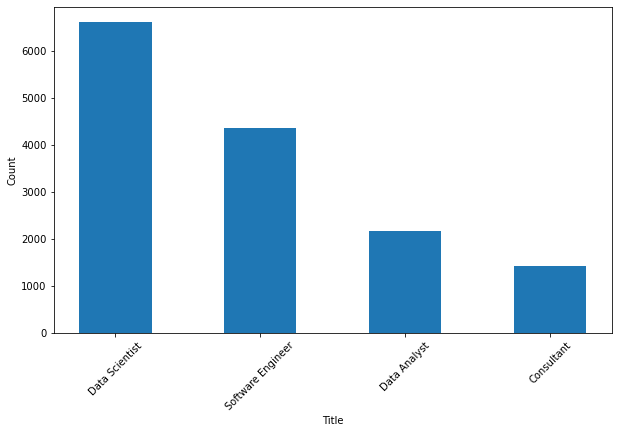

In [35]:
plt.figure(figsize=(10, 6))

# Count the frequency of each location
title_counts = df1["TITLE"].value_counts()

# Select the top 5 locations
top_title = title_counts

# Plot the top 5 locations
plt.bar(top_title.index, top_title.values, width=0.5)
plt.xlabel("Title")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.show()

In [36]:
title_counts = df['TITLE'].value_counts()

title_counts

Data Scientist       6611
Software Engineer    4364
Data Analyst         2177
Consultant           1429
Name: TITLE, dtype: int64

In [39]:
unique_titles = df1['TITLE'].unique()

# Print the unique locations
for title in unique_titles:
    print(title)

Software Engineer
Data Analyst
Data Scientist
Consultant


Right now our dataset is in descending order of the salary let's change that and make a new dataframe df2.

In [37]:
df1.head(25)

,COMPANY,EXPERIENCE,LOCATION,TITLE,SALARY,SKILLS
0,KPMG,15+ yrs,Chennai,Software Engineer,5000000,C
1,Premium-Jobs hiring for Internet,15+ yrs,Delhi,Software Engineer,5000000,JavaScript
2,Vanguard Human Resource Consultant,15+ yrs,Delhi,Software Engineer,5000000,JavaScript
3,V- Konnect Associates,15+ yrs,Delhi,Data Analyst,5000000,Python
4,Spruce Software Tech,15+ yrs,Bangalore,Data Analyst,5000000,Python
5,Leading client of HR Next,15+ yrs,Chennai,Data Analyst,5000000,Python
6,Kamms management Consultants hiring for Client...,15+ yrs,Kolkata,Data Analyst,5000000,SQL
7,Executive Scouters hiring for Compliance Leade...,15+ yrs,Bangalore,Data Analyst,5000000,Python
8,Finger Tips hiring for A client of Fingertips,15+ yrs,Hyderabad,Data Analyst,5000000,Python
9,Green And Wise,15+ yrs,Delhi,Software Engineer,5000000,JavaScript


In [38]:
df2 = df1.sample(frac=1).reset_index(drop=True)
df2.head(25)

,COMPANY,EXPERIENCE,LOCATION,TITLE,SALARY,SKILLS
0,Audi India,7 - 10 yrs,Mumbai,Data Scientist,1000000,Django
1,Head-field hiring for Head field sol,0 - 2 yrs,Kolkata,Consultant,300000,SQL
2,Multi Commodity Exchange of India,7 - 10 yrs,Bangalore,Software Engineer,1000000,CSS
3,Falcon Services,Freshers,Bangalore,Data Analyst,200000,Azure
4,DK Energy,7 - 10 yrs,Bangalore,Data Scientist,1000000,JavaScript
5,Kodiak Networks India,7 - 10 yrs,Hyderabad,Software Engineer,1000000,CSS
6,Hindco Recruitment Consultants hiring for A Le...,7 - 10 yrs,Delhi,Data Scientist,1000000,MySQL
7,Metro Career Solutions hiring for Many Top Ind...,3 - 5 yrs,Bangalore,Data Scientist,550000,Excel
8,SPICE WEB SERVICES,7 - 10 yrs,Hyderabad,Data Scientist,1000000,AWS
9,Flexus Soft Services hiring for MNC E - Publis...,0 - 2 yrs,Chennai,Data Analyst,400000,Tableau


Great now our dataframe is in random order, don't worry all the data is in same manner as it was previously i just shuffled the rows.

To date, we have completed cleaning, analyzing, and creating visualizations for each individual column in the dataframe. Moving forward, we will now proceed to analyze two columns simultaneously and develop a set of helpful functions to facilitate a clearer understanding of the data. Our aim is to ensure that these functions are user-friendly, allowing a third party to effortlessly utilize them and obtain the specific information they desire.

## Let's check what are `skills` required for a specific `job role`.<br>
We will make a DataFrame containing job titles and skills, groups the data by job roles, and creates a new DataFrame that aggregates the unique skills for each job role. The resulting DataFrame provides a consolidated view of job titles and their associated skills.

In [42]:
def job_skills_dataframe(df2):
    
    # Create an empty DataFrame with 'TITLE' and 'SKILLS' columns
    job_skills_df2 = pd.DataFrame(columns=['TITLE', 'SKILLS'])

    # Group the DataFrame by unique job roles in the TITLE column
    grouped = df2.groupby('TITLE')

    # Iterate over each job role group
    for title, group in grouped:
        # Get the unique skills for the current job role group
        unique_skills = group['SKILLS'].unique()

        # Convert float values to strings
        unique_skills = [str(skill) for skill in unique_skills]

        # Join the unique skills into a string separated by commas
        skills_str = ', '.join(unique_skills)

        # Append the job role and associated skills to the DataFrame
        job_skills_df2 = pd.concat([job_skills_df2, pd.DataFrame({'TITLE': [title], 'SKILLS': [skills_str]})],
                                  ignore_index=True)

    return job_skills_df2

# Adjust display options to show all text in columns
pd.set_option('display.max_colwidth', None)

In [43]:
job_skills_dataframe(df2)

,TITLE,SKILLS
0,Consultant,"SQL, Python, R, PowerBI, Excel, AWS, Azure, Tableau, Oracle, NoSQL"
1,Data Analyst,"Azure, Tableau, Excel, SQL, Oracle, PowerBI, AWS, R, Python, JavaScript, NoSQL, C, Java, Scala"
2,Data Scientist,"Django, JavaScript, MySQL, Excel, AWS, Azure, SQL, Scala, MongoDB, GCP, R, NoSQL, Python, C, Tableau, PowerBI, Oracle, Java"
3,Software Engineer,"CSS, C, JavaScript, SQL, Angular, Oracle, Java, AWS, Node.js"


The code appears to be clean and comprehensible at the moment, doesn't it? 

However, we can further enhance its clarity and visual appeal by developing a function that interacts with the DataFrame. This function will allow users to view the skills specific to the job role they desire. Additionally, we can incorporate a graph to provide a more intuitive representation of the skills, making the understanding process even easier.

In [64]:
def plot_skills_for_job_role(df2, job_role):
    
    if job_role.lower() == 'all':
        # Count the occurrence of each skill for all job roles
        skills = df2['SKILLS'].str.split(', ')
        skill_counts = pd.Series([skill for sublist in skills for skill in sublist]).value_counts()

        # Sort the skills based on count in ascending order
        skill_counts = skill_counts.sort_values(ascending=True)

        # Plot the vertical bar graph for all skills
        plt.figure(figsize=(10, 5))  # Adjust the figure size
        plt.barh(skill_counts.index, skill_counts.values)
        plt.ylabel('Skills')
        plt.xlabel('Count')
        plt.title('Skills for All Job Roles')
        plt.show()
    else:
        # Filter the DataFrame for the given job role
        filtered_df = df2[df2['TITLE'] == job_role]

        # Get the skills for the job role
        skills = filtered_df['SKILLS'].str.split(', ')

        # Count the occurrence of each skill
        skill_counts = pd.Series([skill for sublist in skills for skill in sublist], dtype='object').value_counts()

        # Sort the skills based on count in ascending order
        skill_counts = skill_counts.sort_values(ascending=True)

        # Plot the vertical bar graph for the specific job role
        plt.figure(figsize=(10, 5))  # Adjust the figure size
        plt.barh(skill_counts.index, skill_counts.values)
        plt.ylabel('Skills')
        plt.xlabel('Count')
        plt.title(f'Skills for specific Job Role: {job_role}')
        plt.show()

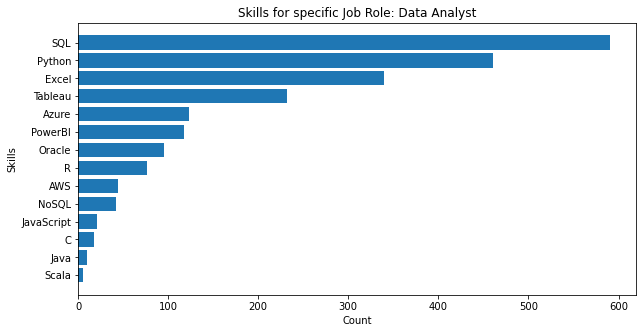

In [65]:
plot_skills_for_job_role(df2, 'Data Analyst')  # Plot for a specific job role

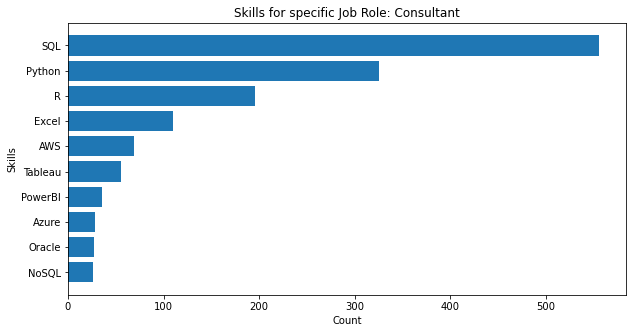

In [46]:
plot_skills_for_job_role(df2, 'Consultant')  # Plot for a specific job role

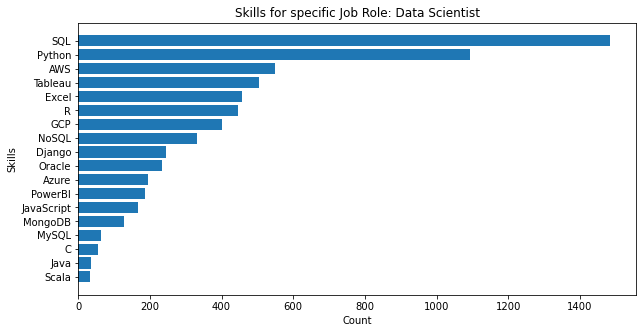

In [47]:
plot_skills_for_job_role(df2, 'Data Scientist')  # Plot for a specific job role

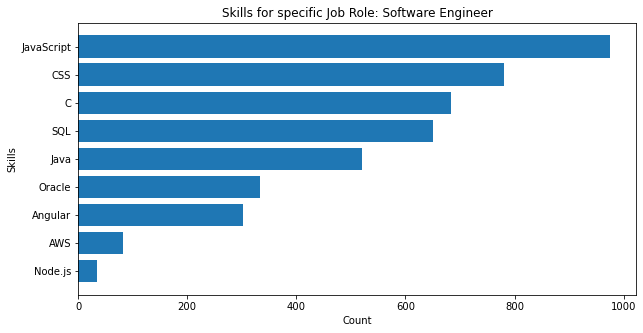

In [48]:
plot_skills_for_job_role(df2, 'Software Engineer')  # Plot for a specific job role

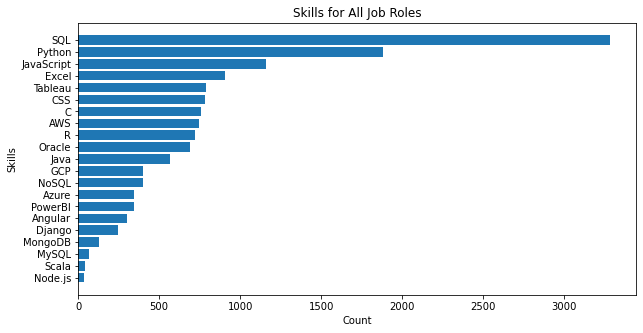

In [49]:
plot_skills_for_job_role(df2, 'all')         # Plot for all job roles

## Now let's see the relationsip between `salary` and `experience`.

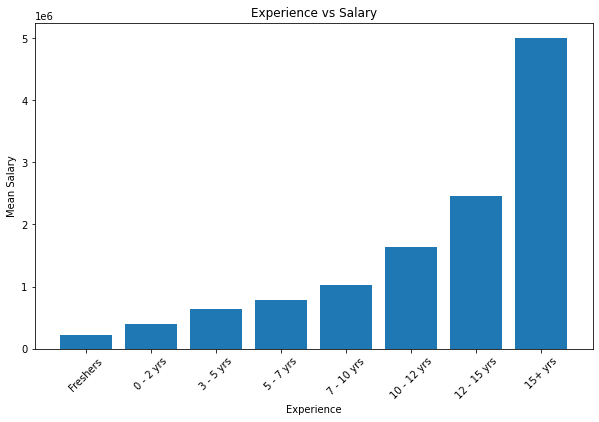

In [52]:
df2_grouped = df2.groupby('EXPERIENCE')['SALARY'].mean()

# Sorting the grouped dataframe by mean salary in ascending order
df2_sorted = df2_grouped.sort_values()

# Extracting the 'EXPERIENCE' and 'SALARY' columns from the sorted dataframe
experience = df2_sorted.index
mean_salary = df2_sorted.values

# Increasing the figure size
plt.figure(figsize=(10, 6))

# Creating the bar plot
plt.bar(experience, mean_salary)

# Adding labels and title to the plot
plt.xlabel('Experience')
plt.ylabel('Mean Salary')
plt.title('Experience vs Salary')
plt.xticks(rotation=45)


# Displaying the plot
plt.show()

From this graph we can see that as the year of experience increases the salary also increases.

Based on the provided graph, we can see that the job role of a data scientist generally offers a higher mean salary. However, it's important to note that this is based on the mean salary and does not guarantee that data scientists always earn the highest salary. It's possible for individuals with significant experience as software engineers to earn a higher salary in that role as well. Salary potential can vary depending on various factors such as experience, skills, industry demand, and individual negotiations.

In [54]:
df3 = df2.copy()

def categorize_skills(skill):
    if re.search(r'\b(sql|NoSQL|Scala|python|java|C|javascript|R|css)\b', skill, re.IGNORECASE):
        return 'Languages'
    elif re.search(r'\b(mongodb|Mysql)\b', skill, re.IGNORECASE):
        return 'Databases'
    elif re.search(r'\b(aws|azure|gcp|oracle)\b', skill, re.IGNORECASE):
        return 'Cloud'
    elif re.search(r'\b(django|Node\.js|Angular)\b', skill, re.IGNORECASE):
        return 'Frameworks'
    elif re.search(r'\b(PowerBI|Tableau|Excel)\b', skill, re.IGNORECASE):
        return 'Tools'
    else:
        return 'Other'

df3['CATEGORY'] = df3['SKILLS'].apply(categorize_skills)

In [55]:
df3.to_csv('df3.csv', index=False)

To ensure the correct distribution of data, I will save this DataFrame to an Excel file and review it there. Excel provides a convenient platform for verifying data distribution, and personally, I find it more convenient to perform such checks using Excel. Although we can do that here also.

In [56]:
df2.head()

,COMPANY,EXPERIENCE,LOCATION,TITLE,SALARY,SKILLS
0,Audi India,7 - 10 yrs,Mumbai,Data Scientist,1000000,Django
1,Head-field hiring for Head field sol,0 - 2 yrs,Kolkata,Consultant,300000,SQL
2,Multi Commodity Exchange of India,7 - 10 yrs,Bangalore,Software Engineer,1000000,CSS
3,Falcon Services,Freshers,Bangalore,Data Analyst,200000,Azure
4,DK Energy,7 - 10 yrs,Bangalore,Data Scientist,1000000,JavaScript


In [57]:
df3.head()

,COMPANY,EXPERIENCE,LOCATION,TITLE,SALARY,SKILLS,CATEGORY
0,Audi India,7 - 10 yrs,Mumbai,Data Scientist,1000000,Django,Frameworks
1,Head-field hiring for Head field sol,0 - 2 yrs,Kolkata,Consultant,300000,SQL,Languages
2,Multi Commodity Exchange of India,7 - 10 yrs,Bangalore,Software Engineer,1000000,CSS,Languages
3,Falcon Services,Freshers,Bangalore,Data Analyst,200000,Azure,Cloud
4,DK Energy,7 - 10 yrs,Bangalore,Data Scientist,1000000,JavaScript,Languages


Perfect so far :)

Let's enhance our previous function 'plot_skills_for_job_role' that displayed the top skills for a specific job. This time, we will include an additional parameter, the skill category, allowing us to showcase skills related to that particular category only.

In [58]:
def plot_skills_required(df3):
    # Ask the user for the specific job role
    job_role = input("Enter the job role (or leave empty for all job roles): ").lower()

    # Ask the user for the specific category
    category = input("Enter the category (or leave empty for all categories): ").lower()

    if job_role and category:
        # Filter the dataframe based on the job role and category
        filtered_df = df3[(df3['TITLE'].str.lower() == job_role) & (df3['CATEGORY'].str.lower() == category)]
        title = f"Skills Required for {job_role} ({category} Category)"
    elif job_role:
        # Filter the dataframe based on the job role
        filtered_df = df3[df3['TITLE'].str.lower() == job_role]
        title = f"Skills Required for {job_role}"
    elif category:
        # Filter the dataframe based on the category
        filtered_df = df3[df3['CATEGORY'].str.lower() == category]
        title = f"Skills Required ({category} Category)"
    else:
        # No specific job role or category selected, plot for all job roles and skills
        filtered_df = df3
        title = "Skills Required for All Job Roles"

    # Count the occurrences of each skill
    skills_counts = filtered_df['SKILLS'].value_counts().sort_values()

    # Plot the skills
    plt.figure(figsize=(12, 6))
    skills_counts.plot(kind='bar')
    plt.xlabel('Skills')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

In [59]:
skills_counts = df3['CATEGORY'].value_counts()

skills_counts

Languages     9583
Cloud         2182
Tools         2041
Frameworks     582
Databases      193
Name: CATEGORY, dtype: int64

Enter the job role (or leave empty for all job roles): Data scientist
Enter the category (or leave empty for all categories): languages


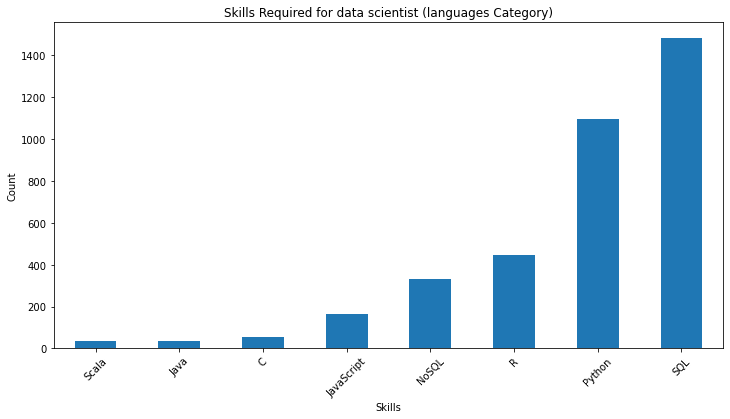

In [61]:
plot_skills_required(df3)

In [62]:
# Extract the unique values from the 'EXPERIENCE' column
experience_unique = df3['EXPERIENCE'].unique().tolist()

# Save the unique values from the 'EXPERIENCE' column as a JSON file
with open('experience.json', 'w') as json_file:
    json.dump(experience_unique, json_file)

# Extract the unique values from the 'LOCATION' column
location_unique = df3['LOCATION'].unique().tolist()

# Save the unique values from the 'LOCATION' column as a JSON file
with open('location.json', 'w') as json_file:
    json.dump(location_unique, json_file)
    
# Extract the unique values from the 'TITLE' column
title_unique = df3['TITLE'].unique().tolist()

# Save the unique values from the 'TITLE' column as a JSON file
with open('title.json', 'w') as json_file:
    json.dump(title_unique, json_file)

# Extract the unique values from the 'SKILLS' column
skills_unique = df3['SKILLS'].unique().tolist()

# Save the unique values from the 'SKILLS' column as a JSON file
with open('skills.json', 'w') as json_file:
    json.dump(skills_unique, json_file)

# Extract the unique values from the 'CATEGORY' column
category_unique = df3['CATEGORY'].unique().tolist()

# Save the unique values from the 'CATEGORY' column as a JSON file
with open('category.json', 'w') as json_file:
    json.dump(category_unique, json_file)

# THANK YOU FOR READING 